In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
path = r"C:\Users\Olegi Megi\Desktop\Dataanalytics\Projects\Top 50 bestseller books\bestsellers with categories.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
# check for null values
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
# check for duplicates
df.duplicated(subset="Name").sum()

199

In [7]:
# drop duplicates
df= df.drop_duplicates(subset="Name")

In [8]:
df.shape

(351, 7)

<AxesSubplot:>

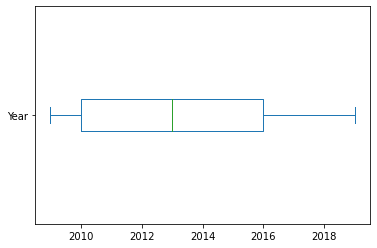

In [9]:
df["Year"].plot(kind="box", vert=False)

<AxesSubplot:>

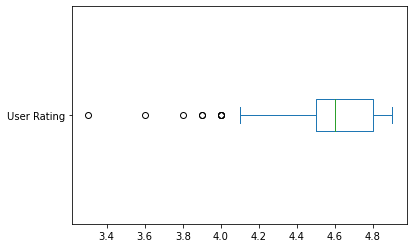

In [10]:
# Rating distribution
df["User Rating"].plot(kind="box", vert=False)

<AxesSubplot:>

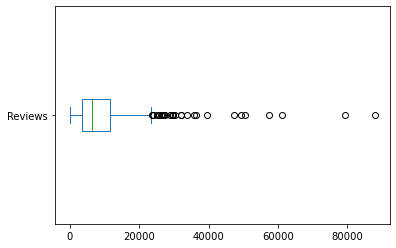

In [11]:
# Reviews distribution
df["Reviews"].plot(kind="box", vert=False)

<AxesSubplot:>

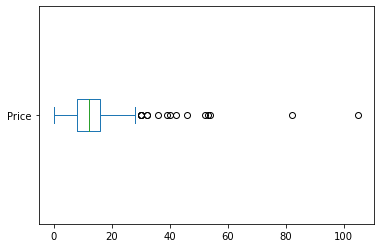

In [12]:
# Price distribution
df["Price"].plot(kind="box", vert=False)

In [13]:
# lets assume that all reviews equal a pruchase
df["Sales"] = np.multiply(df["Price"], df["Reviews"])
print(df["Sales"].sort_values(ascending=False))

382    1430028
338    1396161
534    1317615
69      701295
159     700492
        ...   
358          0
219          0
42           0
71           0
461          0
Name: Sales, Length: 351, dtype: int64


<AxesSubplot:>

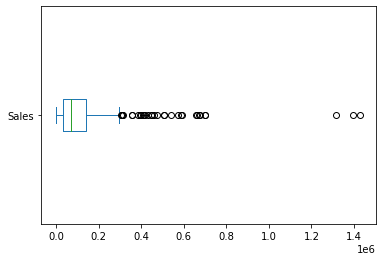

In [14]:
df["Sales"].plot(kind="box", vert=False)

array([[<AxesSubplot:title={'center':'User Rating'}>,
        <AxesSubplot:title={'center':'Reviews'}>],
       [<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>]],
      dtype=object)

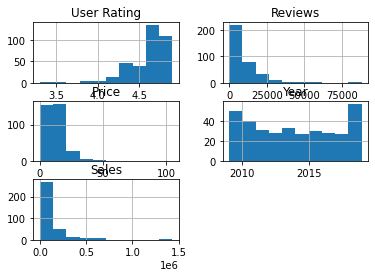

In [15]:
df.hist()

In [16]:
# describe data
df.describe()

,User Rating,Reviews,Price,Year,Sales
count,351.000000,351.000000,351.000000,351.00000,3.510000e+02
mean,4.608832,9799.683761,13.076923,2013.51567,1.258052e+05
std,0.226669,10871.356548,10.050860,3.28271,1.776955e+05
min,3.300000,37.000000,0.000000,2009.00000,0.000000e+00
25%,4.500000,3442.500000,8.000000,2010.00000,3.131550e+04
50%,4.600000,6346.000000,12.000000,2013.00000,7.138800e+04
75%,4.800000,11470.500000,16.000000,2016.00000,1.397460e+05
max,4.900000,87841.000000,105.000000,2019.00000,1.430028e+06


# Genre count

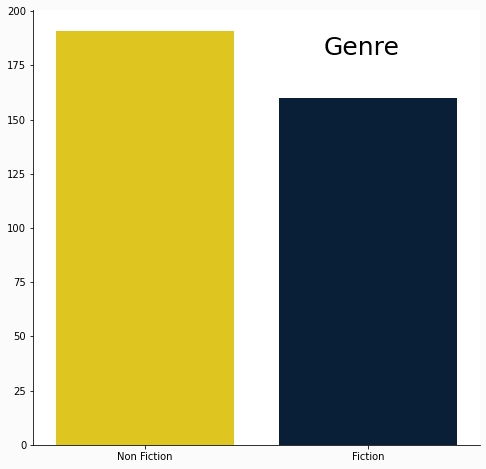

In [17]:
# background color
background = "#fbfbfb"

# make the figure
fig = plt.figure(figsize=(8,8), facecolor=background)
gs = fig.add_gridspec(1,1)
gs.update()

# customize color
colors = {"Fiction": "#001f3f", "Non Fiction": "#ffdc00"}
palette = {key: colors[key] for key in colors.keys()}

# make the pplot
sns.countplot(df["Genre"], palette=palette)

# customize the plot
plt.text(0.8,180, "Genre", fontsize=25)
plt.xlabel("")
plt.ylabel("")

# spines
sns.despine()

# show the plot
plt.show()

# Sales by Genre 

In [18]:
sales_by_genre = df.groupby("Genre")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
sales_by_genre

,Genre,Sales
0,Fiction,26807211
1,Non Fiction,17350397


Text(0.55, 24000000, 'Sales by Genre')

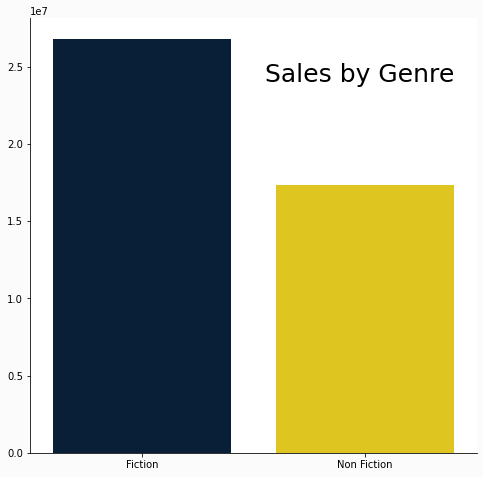

In [19]:
fig = plt.figure(figsize=(8,8), facecolor=background)
gs = fig.add_gridspec(1,1)
gs.update()

colors = {"Fiction": "#001f3f", "Non Fiction": "#ffdc00"}
palette = {key: colors[key] for key in colors.keys()}

sns.barplot(x="Genre", y="Sales", data=sales_by_genre, palette=palette)

plt.xlabel("")
plt.ylabel("")

sns.despine()

plt.text(0.55, 24000000, "Sales by Genre", fontsize=25)

# Most releases by  author

In [20]:
author = df.groupby("Author").size().reset_index(name="count").sort_values(by="count",ascending=False)
author

,Author,count
120,Jeff Kinney,12
197,Rick Riordan,10
221,Stephenie Meyer,7
113,J.K. Rowling,6
27,Bill O'Reilly,6
...,...,...
89,Fredrik Backman,1
90,Gallup,1
91,Garth Stein,1
93,Gayle Forman,1


Text(1, 10.75, 'Top 10 Authors by Books released')

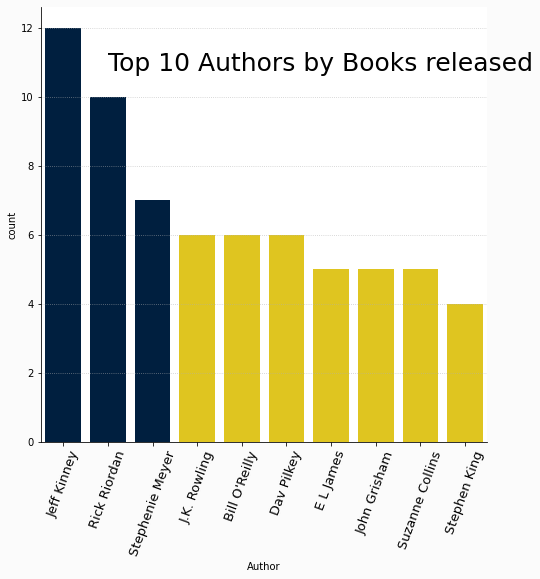

In [21]:
fig = plt.figure(figsize=(8,8), facecolor=background)
gs = fig.add_gridspec(1,1)
gs.update()

ax0 = sns.barplot(x="Author", y="count", data=author.head(10), color="#ffdc00")

for i in range(3):
    ax0.patches[i].set_facecolor("#001f3f")

plt.xticks(rotation=70, fontsize=13)
sns.despine()

ax0.grid(axis="y", linestyle=":", alpha=0.7)

ax0.text(1, 10.75, "Top 10 Authors by Books released", fontsize=25)

# Top Authors by Reviews 

In [22]:
reviews_by_author = df.groupby("Author")["Reviews"].sum().reset_index().sort_values(by="Reviews",
                       ascending=False)
reviews_by_author

,Author,Reviews
76,E L James,130746
226,Suzanne Collins,130548
68,Delia Owens,87841
180,Paula Hawkins,79446
113,J.K. Rowling,70535
...,...,...
143,Larry Schweikart,460
132,Jon Stewart,440
79,Edward M. Kennedy,438
184,Peter A. Lillback,408


Text(1.75, 100000, 'Top 10 Authors by Reviews')

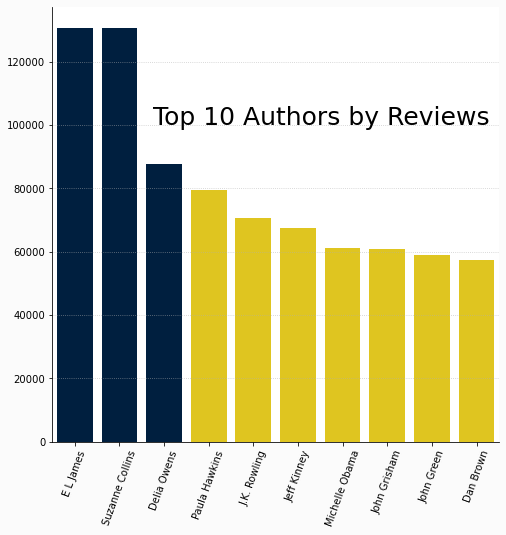

In [23]:
fig = plt.figure(figsize=(8,8), facecolor=background)
gs = fig.add_gridspec(1,1)
gs.update()

ax0 = sns.barplot(x="Author", y="Reviews", data=reviews_by_author.head(10), color="#ffdc00")

plt.grid(axis="y", linestyle=":", alpha=0.7)

for i in range(3):
    ax0.patches[i].set_facecolor("#001f3f")

plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=70)

sns.despine()

plt.text(1.75, 100000, "Top 10 Authors by Reviews", fontsize=25)

#  Top Authors by Sales

In [24]:
authors_by_sales = df.groupby("Author")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
authors_by_sales

,Author,Sales
76,E L James,1855593
226,Suzanne Collins,1677836
180,Paula Hawkins,1430028
182,Paulo Coelho,1396161
113,J.K. Rowling,1369874
...,...,...
247,Zhi Gang Sha,3962
143,Larry Schweikart,920
189,RH Disney,0
67,Delegates of the Constitutional,0


Text(4.5, 1500000, 'Authors by Sales')

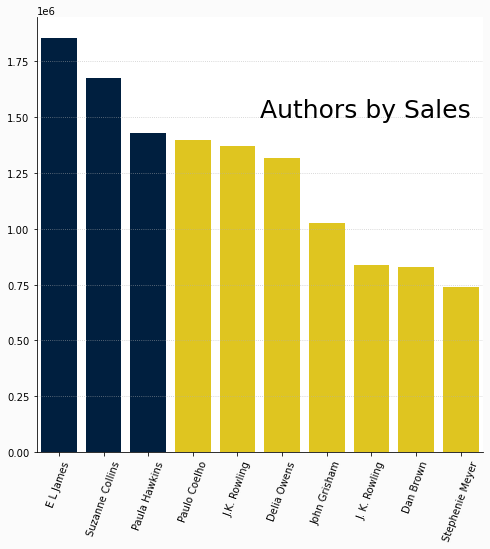

In [25]:
fig = plt.figure(figsize=(8,8), facecolor=background)
gs = fig.add_gridspec(1,1)
gs.update()

ax0 = sns.barplot(x="Author", y="Sales", data=authors_by_sales.head(10), color="#ffdc00")

for i in range(3):
    ax0.patches[i].set_facecolor("#001f3f")

plt.grid(axis="y", linestyle=":", alpha=0.7)

plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=70)

sns.despine()

plt.text(4.5,1500000, "Authors by Sales", fontsize=25)

# Most sales by book 

In [26]:
# lets assume that all reviews equal a pruchase
df["Sales"] = np.multiply(df["Price"], df["Reviews"])
print(df["Sales"].sort_values(ascending=False))

382    1430028
338    1396161
534    1317615
69      701295
159     700492
        ...   
358          0
219          0
42           0
71           0
461          0
Name: Sales, Length: 351, dtype: int64


Text(4, 1300000, 'Top 10 Books by Sales')

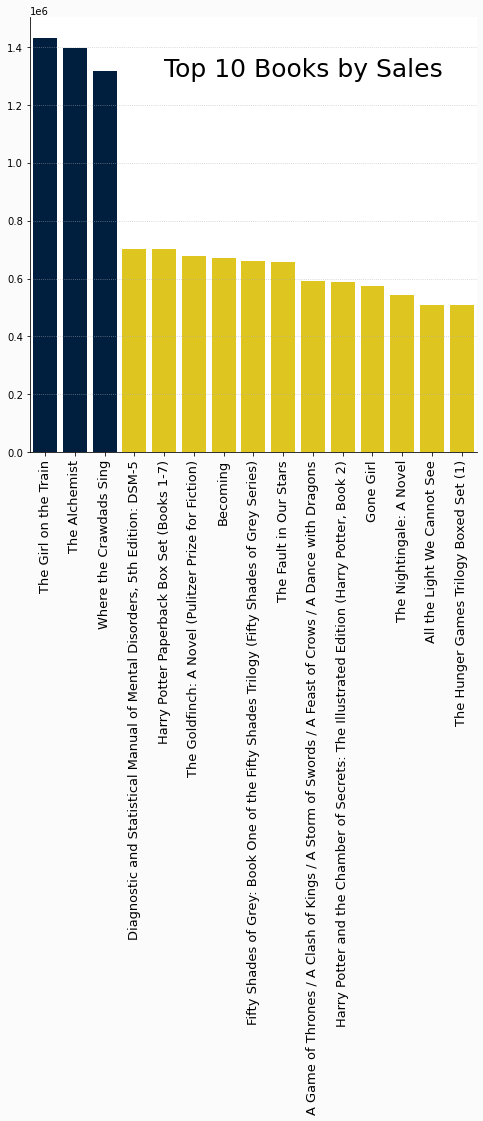

In [27]:
# group data
Sales_by_book = df.groupby("Name")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)

fig = plt.figure(figsize=(8,8), facecolor=background)
gs = fig.add_gridspec(1,1)
gs.update()

ax0 = sns.barplot(x="Name", y="Sales", data=Sales_by_book.head(15), color="#ffdc00")

for i in range(3):
    ax0.patches[i].set_facecolor("#001f3f")

plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90, fontsize=13)

sns.despine()

ax0.grid(axis="y", linestyle=":", alpha=0.7)

ax0.text(4, 1300000, "Top 10 Books by Sales", fontsize=25)

# Readers Rating

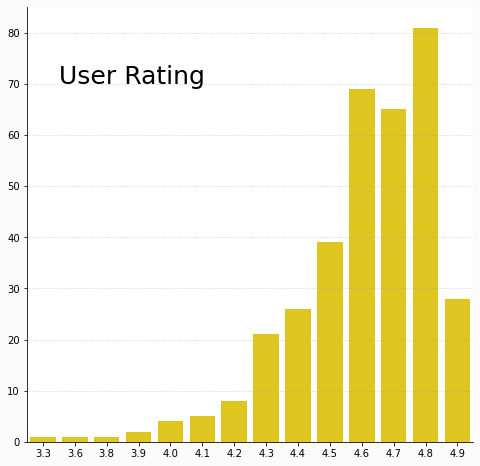

In [28]:
fig = plt.figure(figsize=(8,8), facecolor=background)
gs = fig.add_gridspec(1,1)
gs.update()

sns.countplot(df["User Rating"], color="#ffdc00")

plt.grid(axis="y", linestyle=":", alpha=0.7)

plt.xlabel("")
plt.ylabel("")

plt.text(0.5, 70, "User Rating", fontsize=25)

sns.despine()

#  Releases by Year

In [29]:
# group data and get the count for each yaer
yearly_releases = df.groupby("Year").size().reset_index(name="count")

Text(5, 40, 'Yearly Releases')

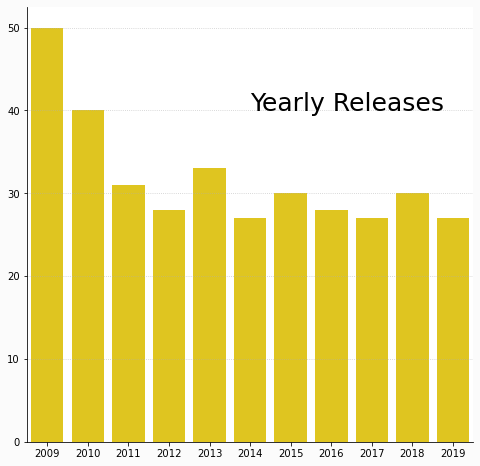

In [30]:
fig = plt.figure(figsize=(8,8), facecolor=background)
gs = fig.add_gridspec(1,1)
gs.update()

sns.barplot(x="Year", y="count", data=yearly_releases, color="#ffdc00")

plt.grid(axis="y", linestyle=":", alpha=0.7)

plt.xlabel("")
plt.ylabel("")

sns.despine()

plt.text(5,40, "Yearly Releases", fontsize=25)

# Reviews by Genre 

In [31]:
non_fiction = df[df["Genre"]=="Non Fiction"]
non_fiction.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Sales
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,138800
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,284685
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,91980
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,17949
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction,920


In [32]:
fiction = df[df["Genre"]=="Fiction"]
fiction.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Sales
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,45144
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,128544
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,139073
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,592050
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,295485


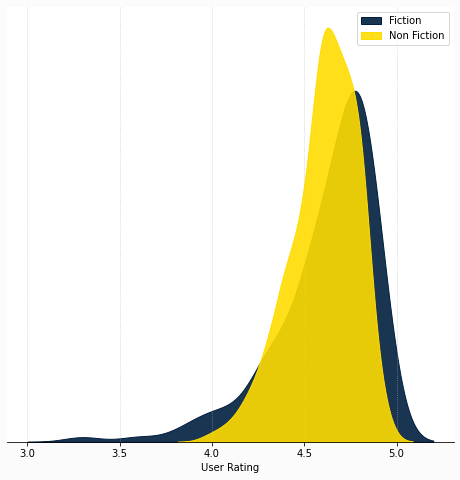

In [33]:
fig = plt.figure(figsize=(8,8), facecolor=background)
gs = fig.add_gridspec(1,1)
gs.update()

sns.kdeplot(fiction["User Rating"], shade=True, alpha=0.9,zorder=1, color="#001f3f", 
            label="Fiction")
sns.kdeplot(non_fiction["User Rating"], shade=True,alpha=0.9 , zorder=2, color="#ffdc00", 
            label="Non Fiction")

sns.despine( top=True, right=True, left=True,)

plt.grid(linestyle=":", alpha=0.7)

plt.ylabel("")
plt.yticks([])

plt.legend()


# Average yearly Sales by Genre

In [34]:
yearly_sales_by_genre = df.groupby(["Year", "Genre"])["Sales"].mean().reset_index()
yearly_sales_by_genre

,Year,Genre,Sales
0,2009,Fiction,85776.791667
1,2009,Non Fiction,58024.576923
2,2010,Fiction,91394.117647
3,2010,Non Fiction,48476.478261
4,2011,Fiction,108233.357143
5,2011,Non Fiction,91430.000000
6,2012,Fiction,240143.500000
7,2012,Non Fiction,118959.916667
8,2013,Fiction,189446.058824
9,2013,Non Fiction,99999.125000


Text(0.0, 1.0, 'Yearly Sales by Genre')

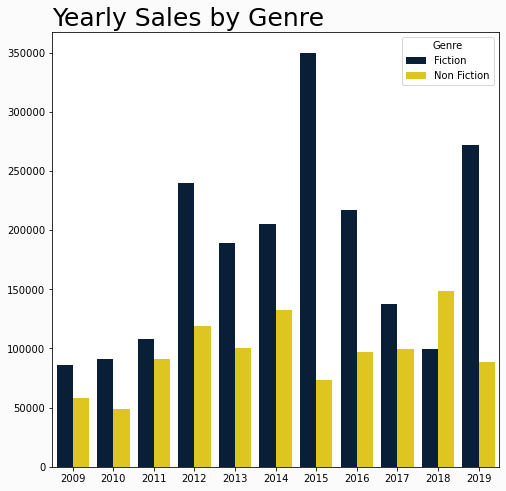

In [35]:
fig = plt.figure(figsize=(8,8), facecolor=background)
gs = fig.add_gridspec(1,1)
gs.update()

sns.barplot(x="Year", y="Sales", hue="Genre", data=yearly_sales_by_genre, palette=palette)

plt.xlabel("")
plt.ylabel("")

plt.title("Yearly Sales by Genre", loc="left", fontsize=25)